# Table of Contents
01 Importing Libraries, Path, Files

02 Task

2 If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

3 You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
    - In a markdown cell beneath your histogram, describe what the histogram demonstrates.

4 The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

5 Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

6 Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents:
    - In a markdown cell beneath your line chart, describe what the line chart shows.

7 You’ll also need to explore whether there’s a connection between age and spending power. To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

8 Export your visualizations as “.png” files in your relevant project folder.

# 01 Importing Libraries, Path, Files

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# define path
path = r'C:\Users\heidi\Desktop\Instacart Basket Analysis 01-09-2022'

In [3]:
# import combined file
df_poc = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products__customers_merged.4.9.pkl'))

# 02 Task

## 2 If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

<AxesSubplot:>

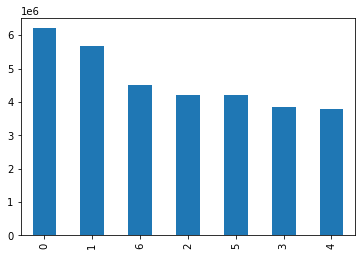

In [4]:
# bar chart based on freq of orders day of week column
df_poc['orders_day_of_week'].value_counts().plot.bar()

<AxesSubplot:ylabel='Frequency'>

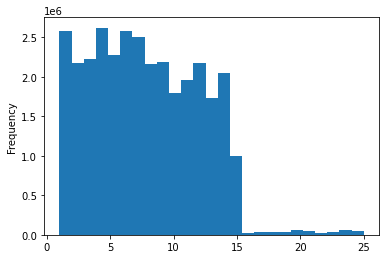

In [5]:
# create histogram of prices with bins of 25
df_poc['prices'].plot.hist(bins = 25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

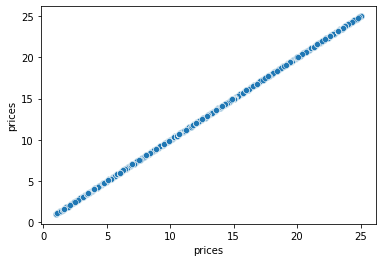

In [6]:
# prices scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = df_poc)

In [7]:
# get a sample of data
np.random.seed(4)
dev = np.random.rand(len(df_poc)) <= 0.7

In [8]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [9]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [11]:
# split df into 2 samples
big = df_poc[dev]

In [12]:
small = df_poc[~dev]

In [13]:
# check the output
len(df_poc)

32404859

In [14]:
len(big) + len(small)

32404859

In [15]:
# create df with only needed columns
df_2 = small[['orders_day_of_week','prices']]

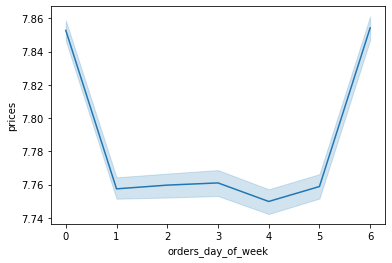

In [16]:
# create line chart
sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

## 3 You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
    ### In a markdown cell beneath your histogram, describe what the histogram demonstrates.

<AxesSubplot:ylabel='Frequency'>

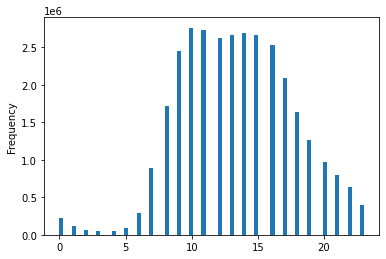

In [18]:
# create histogram of order hour of day with bins of 25
df_poc['order_hour_of_day'].plot.hist(bins = 75)

The histogram demonstrates that orders peak mid morning through evening time and are considerably lighter overnight.

## 4 The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

<AxesSubplot:>

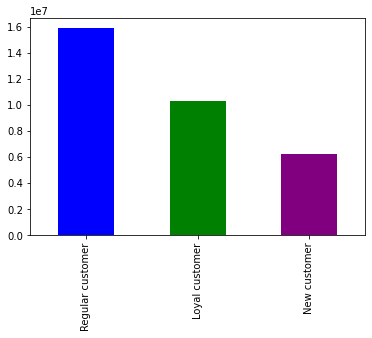

In [20]:
# bar chart based on freq of loyalty_flag column
df_poc['loyalty_flag'].value_counts().plot.bar(color = ['blue', 'green', 'purple'])

## 5 Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [23]:
# create df with only needed columns
df_3 = small[['order_hour_of_day','prices']]

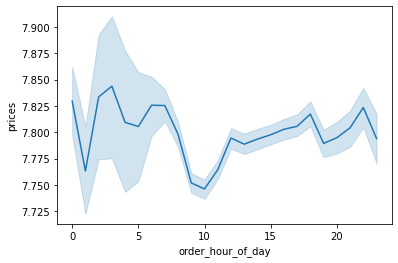

In [24]:
# create line chart
sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

## 6 Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents:
    ### In a markdown cell beneath your line chart, describe what the line chart shows.

In [25]:
# create df with only needed columns
df_4 = small[['age','fam_status', 'dependents']]

In [26]:
# check outcome
df_4.head()

,age,fam_status,dependents
0,31,married,3
2,31,married,3
3,31,married,3
6,31,married,3
10,31,married,3


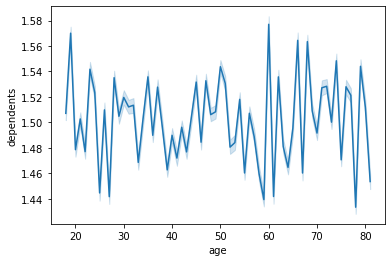

In [27]:
# create line chart
sns.lineplot(data = df_4, x = 'age',y = 'dependents')

I really thought it would be more concentrated in the under 50 crowd, but these results seem all over the board, wildly changing every few years in age.

## 7 You’ll also need to explore whether there’s a connection between age and spending power. To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
    ### In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

<AxesSubplot:xlabel='income', ylabel='age'>

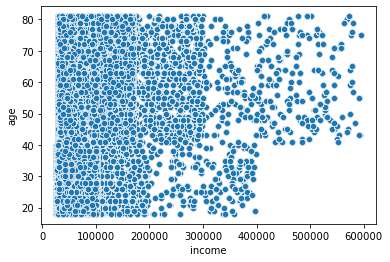

In [29]:
# age vs income scatterplot
sns.scatterplot(x = 'income', y = 'age',data = df_poc)

<AxesSubplot:xlabel='age', ylabel='income'>

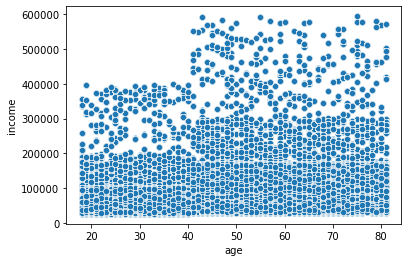

In [30]:
# age vs income scatterplot
sns.scatterplot(x = 'age', y = 'income',data = df_poc)

There appears to be no correlation between age and income of users.

## 8 Export your visualizations as “.png” files in your relevant project folder.

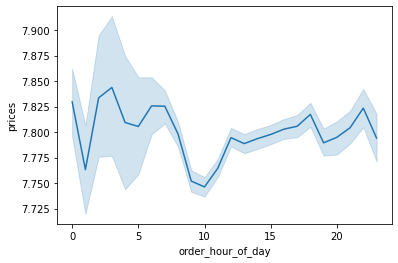

In [36]:
line = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

In [42]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hour_v_prices.png'))

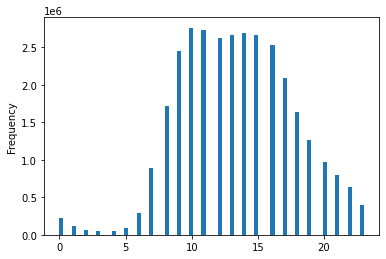

In [38]:
histo = df_poc['order_hour_of_day'].plot.hist(bins = 75)

In [39]:
histo.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hour_hist.png'))

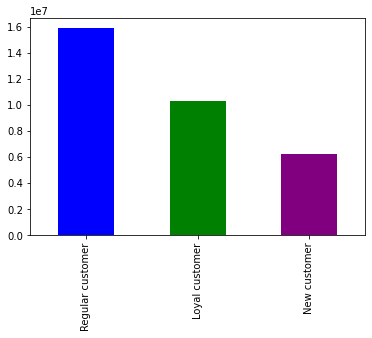

In [40]:
loyal = df_poc['loyalty_flag'].value_counts().plot.bar(color = ['blue', 'green', 'purple'])

In [41]:
loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_bar.png'))

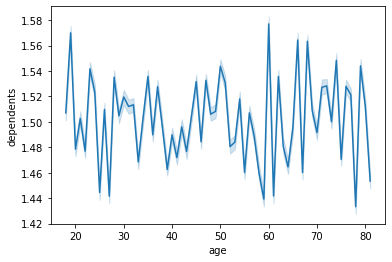

In [43]:
line2 = sns.lineplot(data = df_4, x = 'age',y = 'dependents')

In [44]:
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_v_dependents.png'))

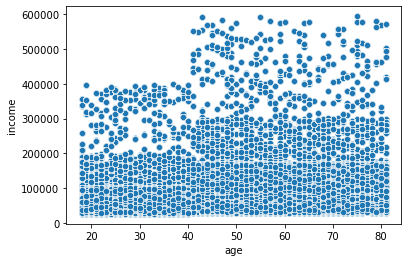

In [45]:
scat = sns.scatterplot(x = 'age', y = 'income',data = df_poc)

In [46]:
scat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_v_income.png'))